In [1]:
!pip3 install gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np

# FastText (deduce words not in a vocab list)

In [ ]:
from gensim.models import FastText

from gensim.test.utils import common_texts  # some example sentences

print(common_texts[0])

print(len(common_texts), common_texts)

model = FastText(window=3, min_count=1)

model.build_vocab(sentences=common_texts)
model.wv.vocab

model.train(sentences=common_texts, total_examples=len(common_texts), epochs=10)  # train

['human', 'interface', 'computer']
9 [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(model.wv['computer hub'].reshape(1,-1), model.wv['computer'].reshape(1,-1))
# cosine_similarity(model.wv['rise'].reshape(1,-1), model.wv['computer'].reshape(1,-1))

array([[0.89092785]], dtype=float32)

# KeyedVectors (Faster than Word2Vec, further train not allowed)

In [ ]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
WORD2VEC_MODEL = "glove-wiki-gigaword-200"
model: KeyedVectors = api.load(WORD2VEC_MODEL)
print("before:", len(model.wv.vocab))
model.build_vocab([['Jack Daniels', 'Jack Nicolson']], update=True)
print("after:", len(model.wv.vocab))

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>
before: 400000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


AttributeError: ignored

In [ ]:
https://colab.research.google.com/drive/1gN44P_vbBruIyU71WCygcpIpsMp3mmCL#scrollTo=dPvfGdfxtgCf

# Tokenization with spacy

In [2]:
# https://spacy.io/
!pip3 install spacy
# spacy 예측기반 모델 hence download weight set
# 사전훈련된 nlp 모델 다운로드 
# https://spacy.io/models/en#en_core_web_sm
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 7.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
!pip install pickle5

     |████████████████████████████████| 132 kB 7.1 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219335 sha256=2d5204d9ad09d76ae19933d22e214577fff4d29d7264eed7647668e6fe4be634
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [4]:
import spacy
from spacy.matcher import Matcher
import pandas as pd
import pickle5 as pickle
from typing import List, Dict, Tuple

In [5]:
def load_obj(name):
  with open(f'{name}.pkl', 'rb') as f:
      return pickle.load(f)

In [6]:
CAST = load_obj('Cast')
CORPUS = load_obj('StoryLine')

In [7]:
CORPUS[-2]

'In the Atlantic during WW II, a ship and a German U-boat are involved in battle, and both are sunk. The survivors - from a variety of backgrounds -gather in one of the life boats. Trouble begins when they pull a man out of the water who turns out to be from the U-boa —Col Needham <col@imdb.com>'

In [8]:
import re

CORPUS = [re.sub('\s?—.*\S+@\S+', ".", c)for c in CORPUS]

In [ ]:
###  BRING MOVIE TITLE TOO  ###
# import csv

# with open("CORPUS.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerows(a)

In [9]:
CORPUS[:3], CAST[:3]

(["Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.",
  'The Godfather "Don" Vito Corleone is the head of the Corleone mafia family in New York. He is at the event of his daughter\'s wedding. Michael, Vito\'s youngest son and a decorated WW II Marine is also present at the wedding. Michael seems to be uninterested in being a part of the family business. Vito is a powerful man, and is kind to all those who give him respect but is ruthless against those who do not. But when a powerful and treacherous rival wants to sell drugs and needs the Don\'s influence for the same, Vito refuses to do it. What follows is a clash between Vito\'s fading old values and the new ways which may cause Michael to

In [10]:
from spacy.pipeline import merge_entities

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe(merge_entities)

In [11]:
#'The Godfather "Don" Vito Corleone is the head of the Corleone mafia family in New York. He is at the event of his daughter\'s wedding. Michael, Vito\'s youngest son and a decorated WW II Marine is also present at the wedding. Michael seems to be uninterested in being a part of the family business. Vito is a powerful man, and is kind to all those who give him respect but is ruthless against those who do not. But when a powerful and treacherous rival wants to sell drugs and needs the Don\'s influence for the same, Vito refuses to do it. What follows is a clash between Vito\'s fading old values and the new ways which may cause Michael to do the thing he was most reluctant in doing and wage a mob war against all the other mafia families which could tear the Corleone family apart.',#
doc = nlp(CORPUS[1])

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Corleone 53 61 ORG
New York 78 86 GPE
Michael 134 141 PERSON
Vito 143 147 PERSON
WW II Marine 179 191 WORK_OF_ART
Michael 224 231 PERSON
Vito 297 301 PERSON
Don 485 488 PERSON
Vito 515 519 PERSON
Vito 570 574 PERSON
Michael 628 635 PERSON
mafia 724 729 ORG
Corleone 760 768 ORG


In [56]:
[
    [(token.lemma_, token.text, token.norm_, token) for token in nlp(c) if token.pos_ != "PUNCT"]
    for c in CORPUS[1:2]
]

[[('the', 'The', 'the', The),
  ('Godfather', 'Godfather', 'godfather', Godfather),
  ('Don', 'Don', 'don', Don),
  ('Vito', 'Vito', 'vito', Vito),
  ('Corleone', 'Corleone', 'corleone', Corleone),
  ('be', 'is', 'is', is),
  ('the', 'the', 'the', the),
  ('head', 'head', 'head', head),
  ('of', 'of', 'of', of),
  ('the', 'the', 'the', the),
  ('Corleone', 'Corleone', 'corleone', Corleone),
  ('mafia', 'mafia', 'mafia', mafia),
  ('family', 'family', 'family', family),
  ('in', 'in', 'in', in),
  ('New York', 'New York', 'new york', New York),
  ('-PRON-', 'He', 'he', He),
  ('be', 'is', 'is', is),
  ('at', 'at', 'at', at),
  ('the', 'the', 'the', the),
  ('event', 'event', 'event', event),
  ('of', 'of', 'of', of),
  ('-PRON-', 'his', 'his', his),
  ('daughter', 'daughter', 'daughter', daughter),
  ("'s", "'s", "'s", 's),
  ('wedding', 'wedding', 'wedding', wedding),
  ('Michael', 'Michael', 'michael', Michael),
  ('Vito', 'Vito', 'vito', Vito),
  ("'s", "'s", "'s", 's),
  ('young', '

In [61]:
t_CORPUS = [
           [token.lemma_ for token in nlp(c) if token.pos_ != "PUNCT"]
           for c in CORPUS
]
print(t_CORPUS[1])

['the', 'Godfather', 'Don', 'Vito', 'Corleone', 'be', 'the', 'head', 'of', 'the', 'Corleone', 'mafia', 'family', 'in', 'New York', '-PRON-', 'be', 'at', 'the', 'event', 'of', '-PRON-', 'daughter', "'s", 'wedding', 'Michael', 'Vito', "'s", 'young', 'son', 'and', 'a', 'decorate', 'WW II Marine', 'be', 'also', 'present', 'at', 'the', 'wedding', 'Michael', 'seem', 'to', 'be', 'uninterested', 'in', 'be', 'a', 'part', 'of', 'the', 'family', 'business', 'Vito', 'be', 'a', 'powerful', 'man', 'and', 'be', 'kind', 'to', 'all', 'those', 'who', 'give', '-PRON-', 'respect', 'but', 'be', 'ruthless', 'against', 'those', 'who', 'do', 'not', 'but', 'when', 'a', 'powerful', 'and', 'treacherous', 'rival', 'want', 'to', 'sell', 'drug', 'and', 'need', 'the', 'Don', "'s", 'influence', 'for', 'the', 'same', 'Vito', 'refuse', 'to', 'do', '-PRON-', 'what', 'follow', 'be', 'a', 'clash', 'between', 'Vito', "'s", 'fade', 'old', 'value', 'and', 'the', 'new', 'way', 'which', 'may', 'cause', 'Michael', 'to', 'do', '

In [ ]:
# attrs = [
#            (token.text, token.lemma_, token.pos_, token.tag_, token.norm_)
#            for token in nlp(CORPUS[1])
#            if token.pos_ != "PUNCT"
# ]
# attrs

In [ ]:
# import json
# x = '[ "A","B","C" , " D"]'
# json.loads(x)

# TFIDF matrix

In [80]:
# tfidf_CORPUS = [" ".join(c) for c in t_CORPUS]

## only NOUNs?   <-- no named entities
noun_words = [
           [token.lemma_ for token in nlp(c) if token.pos_ == "NOUN"]
           for c in CORPUS
]
tfidf_CORPUS = [" ".join(c) for c in noun_words]
tfidf_CORPUS[1]

'head mafia family event daughter wedding son wedding part family business man respect rival drug influence clash value way thing mob war family family'

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')  # stop_words?
matrix = vectorizer.fit_transform(tfidf_CORPUS)

words = vectorizer.get_feature_names()
dtm_tfidf = matrix.toarray()

print(words)
print(dtm_tfidf[1])

['000', '10', '1000', '10th', '11', '12', '13', '145', '14th', '15', '15th', '16mm', '17th', '1870', '18th', '1912', '1920', '1930', '1940', '1950', '1959', '1960', '1960s', '1963', '1965', '1970', '1975', '1977', '1978', '1980', '1982', '1983', '1989', '1990', '1st', '20', '2029', '2035', '2054', '20th', '21', '22', '23rd', '24', '25', '30', '31', '31st', '34', '35', '36', '37', '40', '48th', '51', '55', '57', '59', '60', '62', '70', '7th', '7yo', '80', 'abandon', 'abducted', 'abduction', 'abductor', 'ability', 'abkhaz', 'abolitionist', 'abortion', 'abortionist', 'absence', 'absolution', 'abstentionist', 'abuse', 'abyss', 'academy', 'acceptance', 'access', 'accessory', 'accident', 'acclaim', 'accomplice', 'accordionist', 'account', 'accuracy', 'accusation', 'ace', 'acquaintance', 'act', 'action', 'activist', 'activity', 'actor', 'actress', 'actuality', 'acupuncture', 'ad', 'adaptation', 'addict', 'addiction', 'addition', 'address', 'adieu', 'adjustment', 'administration', 'admirer', '

In [82]:
dtm_tfidf.shape

(1000, 4316)

In [84]:
top_tfidf_scores = np.argsort(dtm_tfidf[1])[-10:]
[words[w] for w in top_tfidf_scores][::-1]

['family',
 'wedding',
 'clash',
 'value',
 'mafia',
 'influence',
 'rival',
 'respect',
 'mob',
 'business']

t_CORPUS used to build TFIDF
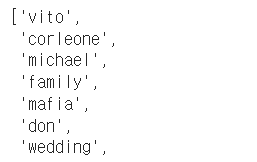

noun words used to build TFIDF
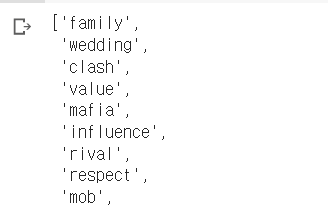

## FastText Test

In [ ]:
from gensim.models import FastText

model = FastText(window=5, min_count=1)

model.build_vocab(sentences=t_CORPUS)
print(model.wv.vocab)

{'chronicle': <gensim.models.keyedvectors.Vocab object at 0x7fe6ad6ee450>, 'the': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b56d0>, 'experience': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5e50>, 'of': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5ed0>, 'a': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5d90>, 'formerly': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5fd0>, 'successful': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5350>, 'banker': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5390>, 'as': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5e10>, 'prisoner': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5f90>, 'in': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b53d0>, 'gloomy': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5450>, 'jailhouse': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5490>, 'Shawshank': <gensim.models.keyedvectors.Vocab object at 0x7fe6922b5410>, 'aft

In [ ]:
model.train(sentences=t_CORPUS, total_examples=len(t_CORPUS), epochs=100)  # train

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(model.wv['cell phone'].reshape(1,-1), model.wv['cell'].reshape(1,-1)))
print(cosine_similarity(model.wv['cell phone'].reshape(1,-1), model.wv['phone'].reshape(1,-1)))
print(cosine_similarity(model.wv['cell phone'].reshape(1,-1), model.wv['computer'].reshape(1,-1)))
print("---------------------------")

print(cosine_similarity(model.wv['pistol'].reshape(1,-1), model.wv['gun'].reshape(1,-1)))  # strange....
print(cosine_similarity(model.wv['shotgun'].reshape(1,-1), model.wv['gun'].reshape(1,-1)))
print(cosine_similarity(model.wv['rifle'].reshape(1,-1), model.wv['gun'].reshape(1,-1)))
print("---------------------------")

print(cosine_similarity(model.wv['cell'].reshape(1,-1), model.wv['prison cell'].reshape(1,-1)))
print(cosine_similarity(model.wv['cell'].reshape(1,-1), model.wv['prison'].reshape(1,-1)))
print("---------------------------")

print(cosine_similarity(model.wv['raddish'].reshape(1,-1), model.wv['horse raddish'].reshape(1,-1)))  # different object
print(cosine_similarity(model.wv['bear'].reshape(1,-1), model.wv['bare'].reshape(1,-1)))  # simillar spelling

print("---------------------------")
cosine_similarity(model.wv['prison'].reshape(1,-1), (model.wv['prison'] + model.wv['cell']).reshape(1,-1))

[[0.28755224]]
[[0.9453549]]
[[0.13206013]]
---------------------------
[[0.07580941]]
[[0.48684695]]
[[0.05614185]]
---------------------------
[[0.44108117]]
[[-0.06094584]]
---------------------------
[[0.8063542]]
[[0.13279344]]
---------------------------


array([[0.81512034]], dtype=float32)

# USE overview data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gdown

In [ ]:
# --- constants --- #
MOVIES_METADATA_CSV_URL = "https://drive.google.com/u/0/uc?id=15I-izNgUJqybrPLK3qlZhLMCuuNcaJhJ&export=download"
MOVIES_METADATA_CSV = "./movies_metadata.csv"  # save the data in the current directory
DOC_SIZE = 2000  # choose the size of the data here (너무 크면 시간이 오래 걸릴 수도 있음!)
TOP_N = 30

In [ ]:
# download the data
gdown.download(url=MOVIES_METADATA_CSV_URL, output=MOVIES_METADATA_CSV, quiet=False)

In [ ]:
# have a look at the data
movies_df = pd.read_csv(MOVIES_METADATA_CSV, low_memory=False)
display(movies_df.head(3))